In [1]:
import pandas as pd


caminho_locals_data= 'locals.json'

locals_data = pd.read_json(caminho_locals_data, encoding="utf-8" )

locals_data.head()

,_id,name,rooms,scenes,createdAt,updatedAt,__v,owner,automations,contract,invites,opwner
0,{'$oid': '63e4fa68fb065be12cb477cd'},Minha Casa,"[{'name': 'Sala de estar', 'order': 0, '_id': ...",[],{'$date': '2023-02-09T13:51:36.415Z'},{'$date': '2023-02-09T13:51:36.415Z'},1,{'$oid': '63e4fa59fb065be12cb477c7'},[],[],[],NaN
1,{'$oid': '63e506c3fb065be12cb47f07'},Casa de Tiago,"[{'name': 'Sacada', 'order': 0, '_id': {'$oid'...","[{'name': 'Boa noite', 'icon': 'lightbulb', 'a...",{'$date': '2023-02-09T14:44:19.713Z'},{'$date': '2024-03-11T14:49:44.789Z'},12,{'$oid': '63e506b0fb065be12cb47ee8'},"[{'name': 'Liga luz se não tem movimento', 'ac...",[],"[{'status': 'pending', 'owner': {'$oid': '63e5...",NaN
2,{'$oid': '63e57cb5fb065be12cb4d915'},Minha Casa,"[{'name': 'Sala de estar', 'order': 0, '_id': ...",[],{'$date': '2023-02-09T23:07:33.520Z'},{'$date': '2023-02-09T23:07:33.520Z'},1,{'$oid': '63e57ca8fb065be12cb4d8f7'},[],[],[],NaN
3,{'$oid': '63e57df4fb065be12cb4da4b'},Minha Casa,"[{'name': 'Sala de estar', 'order': 0, '_id': ...",[],{'$date': '2023-02-09T23:12:52.632Z'},{'$date': '2023-02-09T23:12:52.632Z'},1,{'$oid': '63e57de7fb065be12cb4da45'},[],[],[],NaN
4,{'$oid': '63e97891fb065be12cb705a9'},Minha Casa,"[{'name': 'Sala de estar', 'order': 0, '_id': ...",[],{'$date': '2023-02-12T23:38:57.570Z'},{'$date': '2023-02-12T23:38:57.570Z'},1,{'$oid': '63e97852fb065be12cb7059a'},[],[],[],NaN


In [3]:
#Listar os possiveis rooms registrados no locals.json

import json

with open('locals.json', 'r', encoding='utf-8') as file:
    locals_data = json.load(file)

rooms_name = []

for local in locals_data:
    if 'rooms' in local:
        for sala in local['rooms']:
            nome_sala = sala['name']
            if nome_sala not in rooms_name:
                rooms_name.append(nome_sala)

print("Nomes das salas registrados:")
print("Numero de Rooms: ", len(rooms_name))
for nome_sala in rooms_name:
    print(nome_sala)


Nomes das salas registrados:
Numero de Rooms:  48
Sala de estar
Cozinha
Banheiro
Sacada
Lavanderia
Garagem
Suite casal
Banheiro suite
Sala estar
Sala
Homologação
Jardim 
Academia
Área serviço
Escritório 
Piscina
Sala festa
Suite baby
Suite visita
Suite Vítor
Suite Ivo/Caren
Área de festa
Quarto de visitas
Quarto da Laura
Copa
Suite
Schlafzimmer
Nelson
Teste
Quarto
Dispensa
Varanda
Corredor
Área Gourmet 
Banheiro Corredor
Banheiro Suíte 
Suíte 
Quarto frente
Quarto dos fundos
Quarto filha
Sala de jogos
Quarto de visita 
Sacada 
Quarto crianças 
Quarto casal
Engenharia
Escritório
Sala de reunião 


c:\Users\Softex\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Softex\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


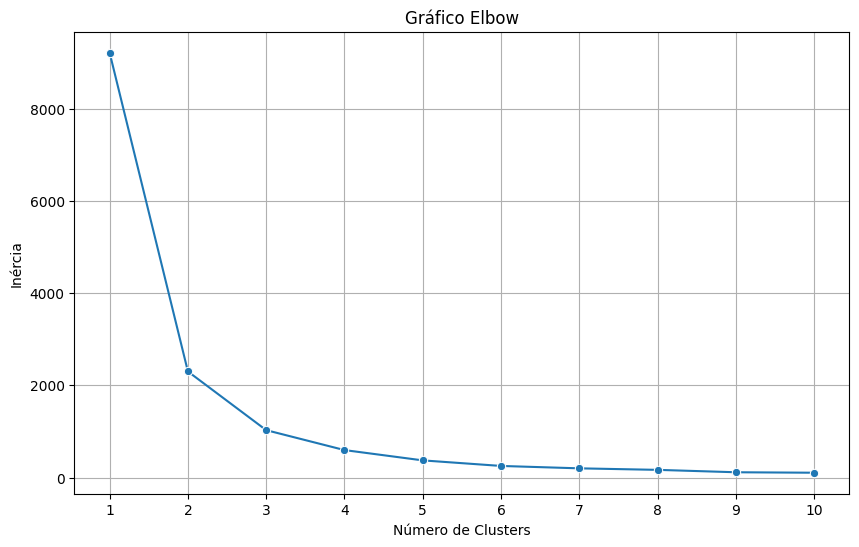

In [4]:
#Determinar o numero de cluster 

from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

rooms_encoded = label_encoder.fit_transform(rooms_name)
dados_numpy = np.array(rooms_encoded).reshape(-1, 1)


rooms_dictionary = dict(zip(rooms_encoded, rooms_name))

kmeans = KMeans()

inercias = []
for k in range(1, 11):
    kmeans.set_params(n_clusters=k)
    kmeans.fit(dados_numpy, rooms_dictionary)
    inercias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 11), y=inercias, marker='o')
plt.title('Gráfico Elbow')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [5]:
#Agrupando os Rooms para achar semelhanca


from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.cluster import KMeans
import numpy as np

# print(len(rooms_name))



vetorizador = TfidfVectorizer()
X = vetorizador.fit_transform(rooms_name)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

clusters = {}
for i in range(len(rooms_name)):
    if kmeans.labels_[i] not in clusters:
        clusters[kmeans.labels_[i]] = [rooms_name[i]]
    else:
        clusters[kmeans.labels_[i]].append(rooms_name[i])

print("Clusters formados:")
for cluster,valor in clusters.items():
    print(f"{cluster} - tamanho : {len(valor)} {valor}")


Clusters formados:
3 - tamanho : 29 ['Sala de estar', 'Cozinha', 'Sacada', 'Lavanderia', 'Garagem', 'Sala estar', 'Sala', 'Homologação', 'Jardim ', 'Academia', 'Área serviço', 'Escritório ', 'Piscina', 'Sala festa', 'Área de festa', 'Copa', 'Schlafzimmer', 'Nelson', 'Teste', 'Dispensa', 'Varanda', 'Corredor', 'Área Gourmet ', 'Suíte ', 'Sala de jogos', 'Sacada ', 'Engenharia', 'Escritório', 'Sala de reunião ']
2 - tamanho : 4 ['Banheiro', 'Banheiro suite', 'Banheiro Corredor', 'Banheiro Suíte ']
0 - tamanho : 6 ['Suite casal', 'Suite baby', 'Suite visita', 'Suite Vítor', 'Suite Ivo/Caren', 'Suite']
1 - tamanho : 9 ['Quarto de visitas', 'Quarto da Laura', 'Quarto', 'Quarto frente', 'Quarto dos fundos', 'Quarto filha', 'Quarto de visita ', 'Quarto crianças ', 'Quarto casal']


In [ ]:
import json

with open('locals.json', 'r' , encoding='utf-8') as file:
    locals_data = json.load(file)


cluster_list= ['Uso geral','Banheiro','Suite','Quarto']
cluster_dictionary = dict(zip(cluster_list, clusters.values()))


cluster_info = [[] for _ in range(len(cluster_list))] 


for cluster, salas in cluster_dictionary.items():
    # info =[]
    for data in locals_data:
        for r in data['rooms']:
            # print(f"len de r : {len(data)}")
            if(r['name'] in salas):
                collected_data = {
                    'owner_id' : data['_id']['$oid'],
                    'house_name' : data['name'],
                    'room_details' : r
                }
                cluster_info[cluster_list.index(cluster)].append(collected_data)
                
  
                
                
for quartos in cluster_info[3]:
    print(quartos)
    
    
#Limpeza dos dados 
i = 0
# for entry in locals_data:
#     for room in entry['rooms']:
#         if 'name' not in room or not room['name']:
#             print(f"Valor ausente para o nome do cômodo em: {room}")
#         else:
#             print(f" {i} -Nenhum valor ausente para o nome do room")
#         i=i+1

# num_dados_vazios = 0
# for documento in locals_data:
#     for entry in documento['rooms']:
#         if 'name' not in entry or not entry['cards']:
#             num_dados_vazios += 1
    # if not documento['cards']:
    #     num_dados_vazios += 1

# print("Número de dados vazios no campo 'cards':", num_dados_vazios)

# empty_count = 0
# friendly_name_count = 0
# for documento in locals_data:
#     for entry in documento['rooms']:
#         for card in entry['cards']:
#             # Verificar se o campo "endpoint" está vazio
#             if not card.get("endpoint"):
#                 empty_count += 1
#             if not card.get("friendly_name"):
#                 friendly_name_count +=1
            
# # Imprimir o total de campos vazios
# print("Total de campos vazios em 'endpoint':", empty_count)
# print("Total de campos vazios em 'name':", friendly_name_count)

# df = pd.DataFrame(locals_data.)




In [55]:
#Tirando as casas de Teste


with open('locals.json', 'r', encoding='utf-8') as file:
    locals_data = json.load(file)

houses_name = []
for house in locals_data:
    nome_casa = house['name'].strip()
    if nome_casa not in houses_name:
        houses_name.append(nome_casa)


lista_de_teste = ['Teste' , 'new' , 'undefined' ]

def tirarCasasDeTeste(houses_name):
    for i in range(len(lista_de_teste)):
    
      houses_name = [house for house in houses_name if lista_de_teste[i] not in house]
    return houses_name
tiradas = tirarCasasDeTeste(houses_name)


print(f"Len de tirada : {len(tiradas)}")
for novo in tiradas:
    print(novo)

    


Len de tirada : 30
Minha Casa
Casa de Tiago
Apartamento IGP
Casa de Homologação
Casa de Ivornei
Casa de Gui
Casa de André
Casa de Luciano
Casa de Diego
Casa de Nelson
Casa de Giácomo
Casa de Cleiton/Marci
Casa de New
Casa de Douglas
Casa de Anderson
Casa de Renan
Casa de Emerson
Casa de Marcelo e Jessica
Casa Thaci & Anderson
PARKS
Casa de Firmware
Casa Projeto Brisa
Casa Projeto Camera
Casa de Demonstração
Casa de Gabriel teste 2
Casa de Raquel Hoffman dos Santos
Casa de Emiliano Amarante
Casa de Leonardo IoT
Casa de Tales Born
Sala de reuniões


In [237]:
#Achando os dados vazios 
with open('locals.json', 'r', encoding='utf-8') as file:
    locals_data = json.load(file)
    
locals_data = pd.DataFrame(locals_data)

locals_data.head(20)

atribute_name = []

for chave,valor in locals_data.items():
    if chave not in atribute_name:
        atribute_name.append(chave)

valores_nulos_por_atributo = {}

for atribute in atribute_name:
    valores_nulos = locals_data[atribute].isna().sum()
    valores_nulos_por_atributo[atribute] = valores_nulos

for atributo, num_nulos in valores_nulos_por_atributo.items():
    if num_nulos > 0:
        print(f"Atributo '{atributo}' tem {num_nulos} valores nulos.")
print("-------------------------------------------------------------")


room_atribute = []
valor_nulo_room = {}


df = locals_data['rooms']

room_valor_nulo = [0 for x in range(len(room_atribute))]
print(room_valor_nulo)


# for i in df:
#     for r in i : 
#         for chave,valor in r.items():
#             if chave not in room_atribute:
#                 room_atribute.append(chave)
#         # print(r)
#         # print(r['cards'])
#         for atribute in room_atribute:
#             # print(r)
#             if atribute == 'cards':
#                 if len(r[atribute]) == 0:
#                     cards_nulo+=1
#             valor_nulo_room[atribute] = cards_nulo
            
            
            
# for atributo, num_nulos in valor_nulo_room.items():
#     if atributo == 'cards':
#         print(f"Atributo '{atributo}' tem {num_nulos} valores nulos.")
        


# df['cards'].describe()

Atributo 'createdAt' tem 1 valores nulos.
Atributo 'owner' tem 2 valores nulos.
Atributo 'opwner' tem 105 valores nulos.
-------------------------------------------------------------
[]
